 # **🛠️  Training a Neural Network on the Iris Dataset**
**Objective**

Train a neural network to classify Iris flower species.

Observe how the loss function (categorical cross-entropy) behaves during training.

**Step 1: Import Libraries and Load the Data
python**


In [1]:
# Import required libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)  # Reshape to a column vector

In [3]:
#One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)


In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape

(120, 4)

**Step 2: Define and Compile the Neural Network**

In [ ]:
# Define the neural network model with multiple hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),   # Layer 1
    tf.keras.layers.Dense(64, activation='relu'),                     # Layer 2
    tf.keras.layers.Dense(32, activation='relu'),                     # Layer 3
    tf.keras.layers.Dense(16, activation='relu'),                     # Layer 4
    tf.keras.layers.Dense(3, activation='softmax')                    # Output Layer
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model using categorical cross-entropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Display model structure
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,931 (19.26 KB)

 Trainable params: 4,931 (19.26 KB)

 Non-trainable params: 0 (0.00 B)

**Step 3: Train the Neural Network and Observe Loss**

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6058 - loss: 0.9760 - val_accuracy: 0.7333 - val_loss: 0.7177
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6958 - loss: 0.7153 - val_accuracy: 0.8000 - val_loss: 0.5315
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7554 - loss: 0.5739 - val_accuracy: 0.8333 - val_loss: 0.4157
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8226 - loss: 0.4546 - val_accuracy: 0.8667 - val_loss: 0.3514
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7892 - loss: 0.4430 - val_accuracy: 0.9333 - val_loss: 0.3015
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8963 - loss: 0.3058 - val_accuracy: 0.9333 - val_loss: 0.2506
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9519 - loss: 0.2775 - val_accuracy: 0.9333 - val_loss: 0.2015
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9133 - loss: 0.2537 - val_accuracy: 0.9333 - val_loss

**Step 4: Plotting Loss and Accuracy**

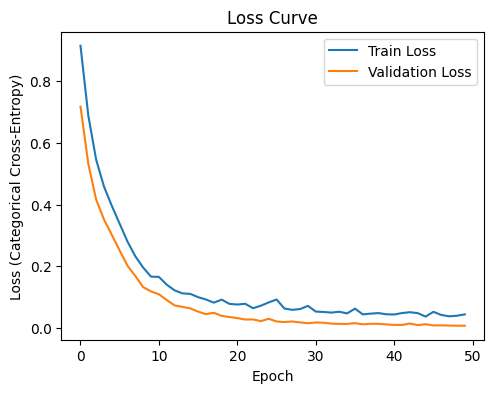

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Cross-Entropy)')
plt.title('Loss Curve')
plt.legend()




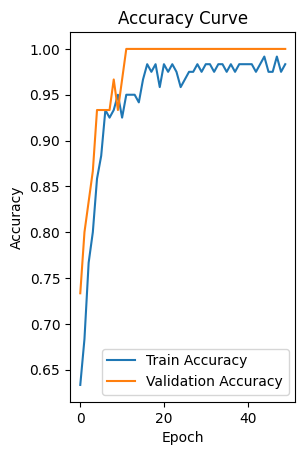

In [ ]:
# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

# **✅ Interpreting Results:**
Observe how the loss decreases with each epoch. This indicates that the model is learning from data by adjusting its weights to minimize the loss.

Monitor validation loss alongside training loss to detect overfitting. Ideally, both curves should trend downward and eventually stabilize.